In [2]:
from IPython.display import Image

# CNN은 컨볼루셔널 레이어와 풀링 레이어를 조합해 만든다.   
지금까지 본 신경망은 FCNN, 완전 연결된 레이어를 affine 계층이라 불렀다   
CNN에서는 다음과 같은 구조가 일반적이다

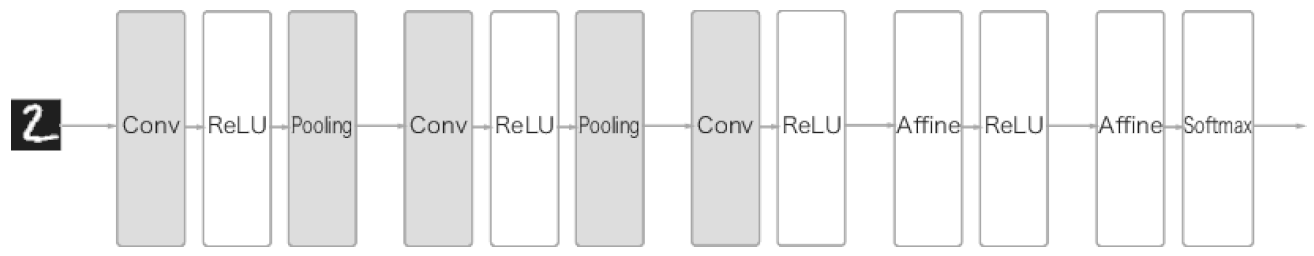

In [3]:
Image("1.png")

### 완전연결 계층의 문제는 데이터의 형상이 무시된다는 것   
이미지의 공간적 정보란 무엇일까?   
1 서로 가까이 있는 픽셀의 값은 비슷하다   
2 RGB의 각 채널은 서로 밀접하게 괸련되어 있다   
3 거리가 먼 픽셀끼리는 별 연관이 없다

따라서 이미지 데이터를 3차원 데이터 그댈로 받았을 때, 그리고 그 데이터를 다음 레이어에 형상을 유지하며 전달했을 때   
데이터를 제대로 이해할 가능성이 생긴다

# 1. 컨볼루셔널 레이어

필터   
편향   
패딩   
스트라이드

## 필터 = 커널

합성곱 연산은 필터의 윈도우를 일정간격으로 이동해가며 입력데이터에 적용한다   
입력과 필터에 대응하는 원소끼리 곱한 후 그 총합을 구한다 : 이 계산을 단일 곱셈 누산 fused multiply-add (FMA) 이라고 한다

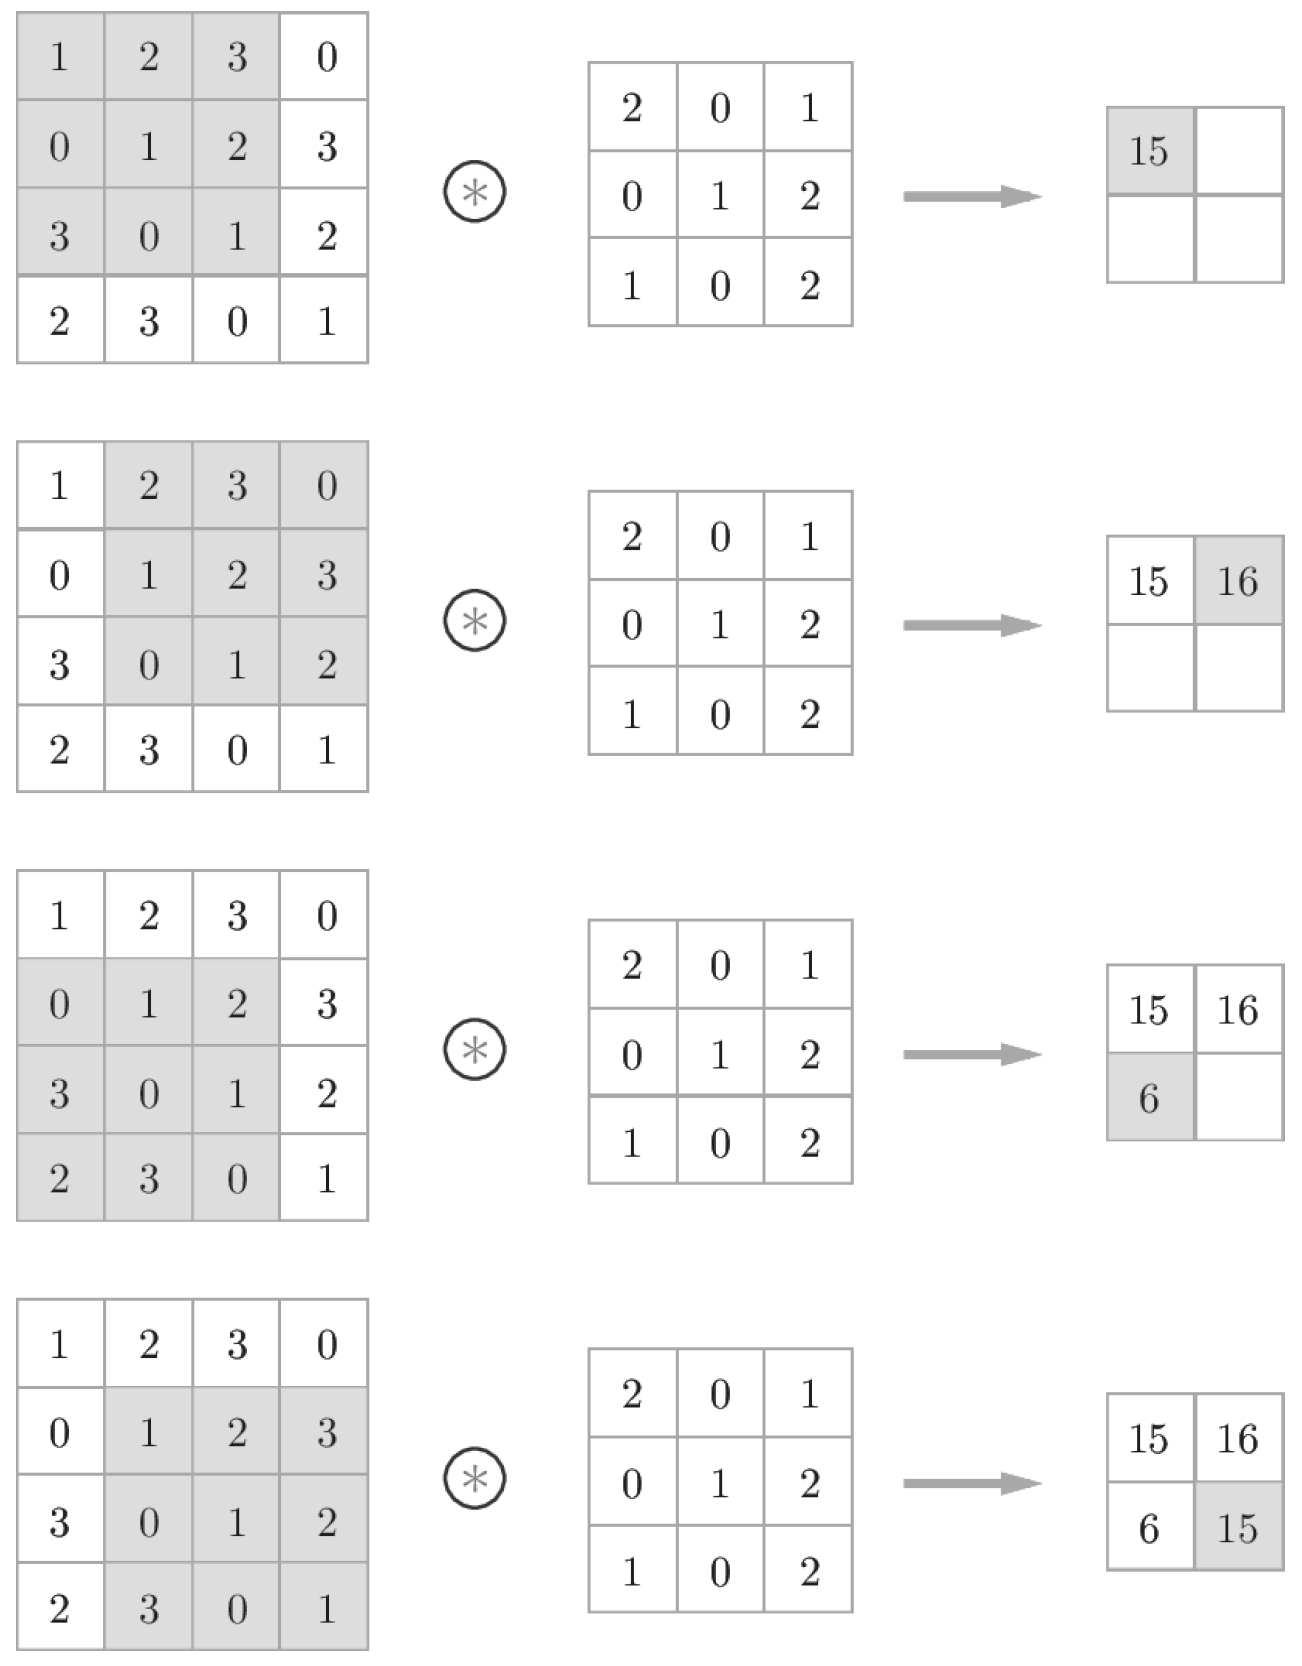

In [4]:
Image("2.png")

다차원 데이터의 경우   
입력데이터와 필터의 합성곱 연산을 채널마다 수행하고   
그 결과를 다 더해서 하나의 출력을 얻는다

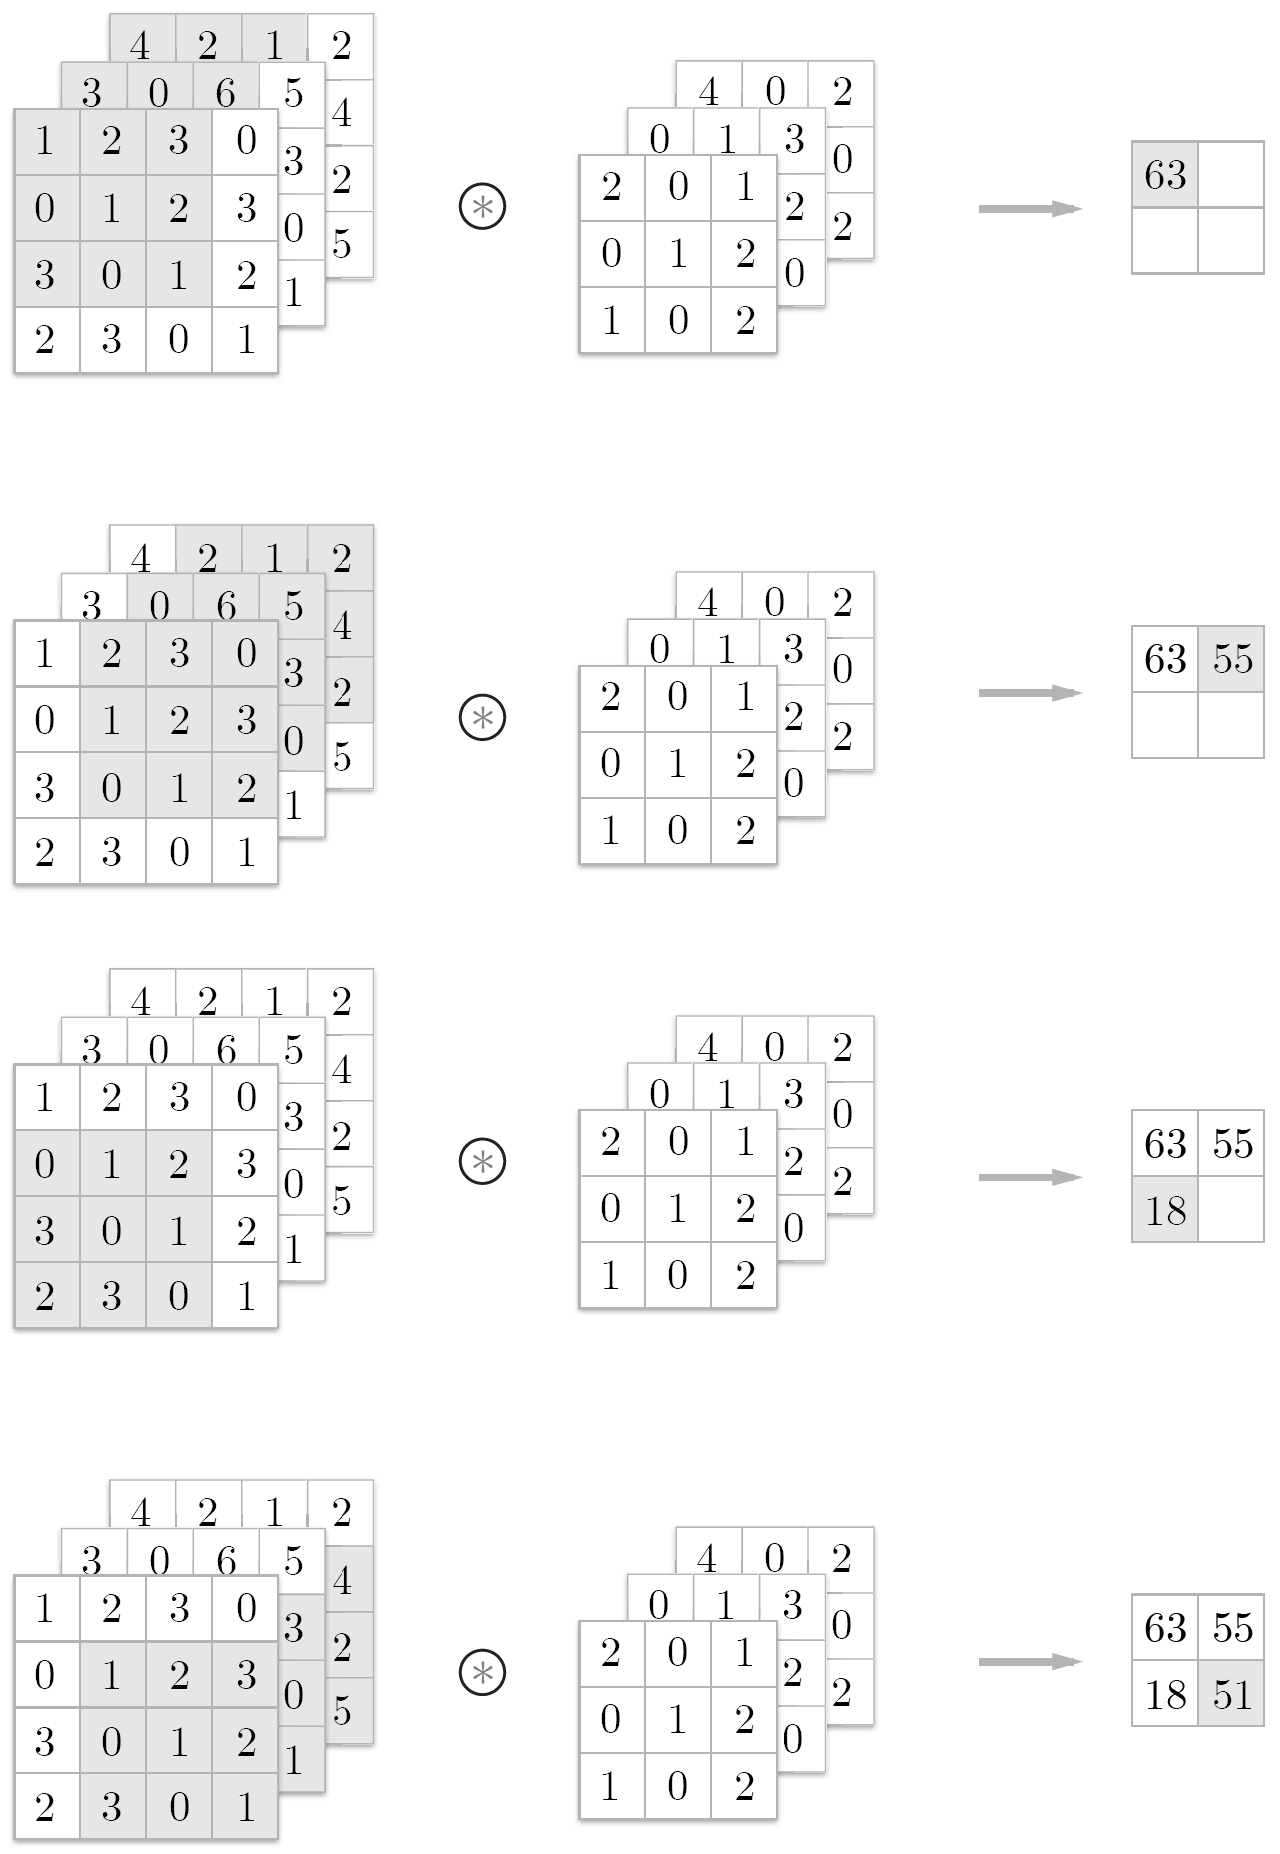

In [9]:
Image("5.png")

In [ ]:
CNN에서는 필터의 매개변수가 그동안의 가중치에 해당한다.

## 편향


### 편향은 합성곱 연산 후 얻어진 output의 각 원소에 일괄 더해준다
### 따라서 편향은 필터 하나당 하나의 값만 있으면 된다

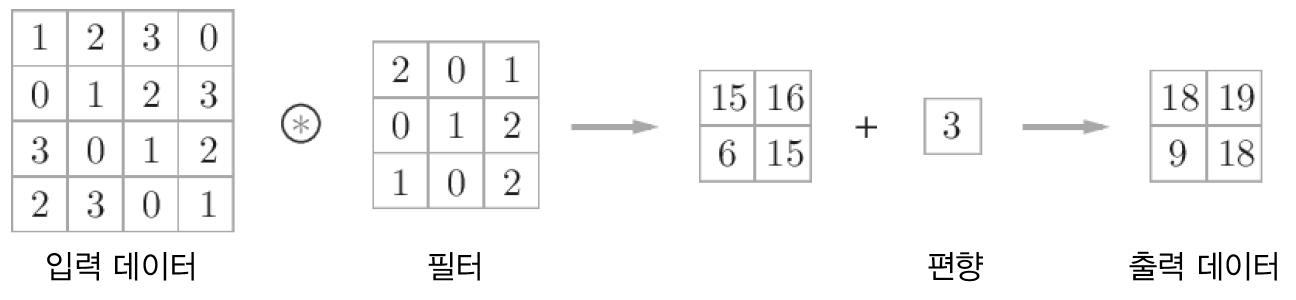

In [5]:
Image("3.png")

## 패딩

패딩을 출력크기를 유지할 수 있다

## 스트라이드

스트라이드를 키우면 출력 크기를 더 빨리 줄일 수 있다

입력크기 H, W   
패딩 P   
필터크기 FH, FW   
스트라이드 S   
출력크기 OH, OW   

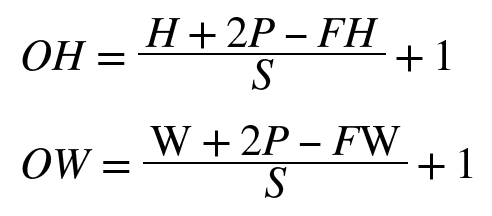

In [8]:
Image("4.png")

## 합성곱 연산의 출력으로 다수의 채널을 보내려면 어떻게 해야할까?   
예컨대 3채널 입력값을 30채널의 출력으로 만들고 싶다면?   
필터를 30개 쓰면 된다 (단 필터 하나의 채널은 입력값의 채널 수와 일치시켜서)   

# 따라서 필터는 4차원 데이터가 된다.   (출력채널수, 입력채널수, 높이, 너비)   

### 여기서 편향은 필터 개수만큼 필요해진다.

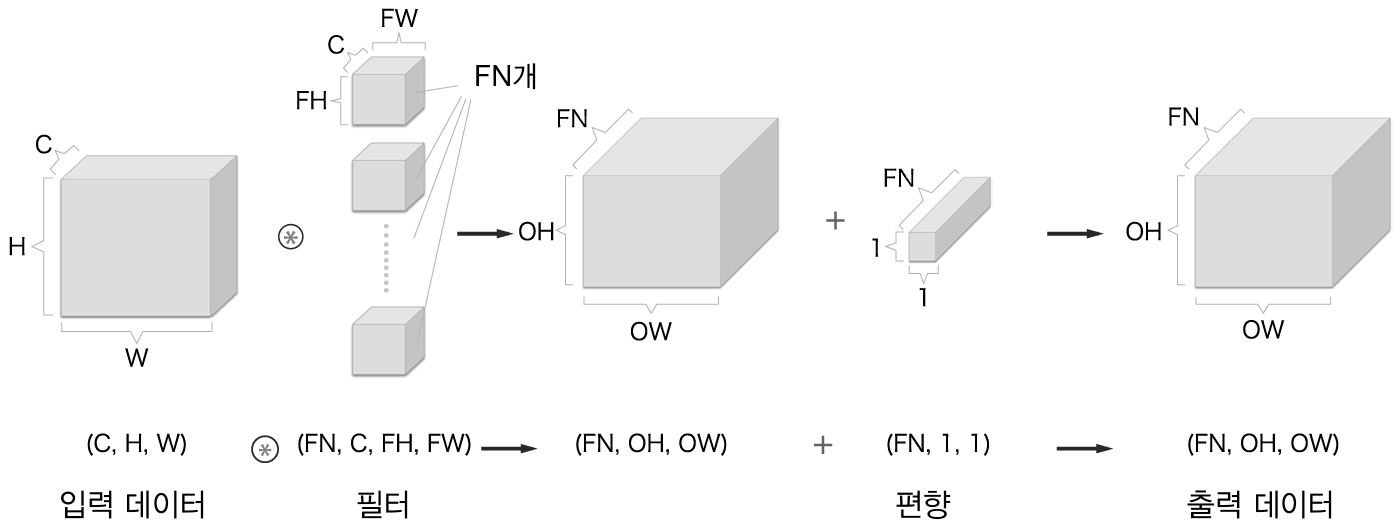

In [11]:
Image("6.png")

위 그림은 입출력 데이터는 3차원 (즉 이미지 한 장일 경우)에 해당

### 그럼 입출력 데이터도 4차원이 되는 경우가 있나? 배치 처리

아래 그림은 입출력 데이터가 4차원 (즉 이미지가 여러장일 경우)에 해당

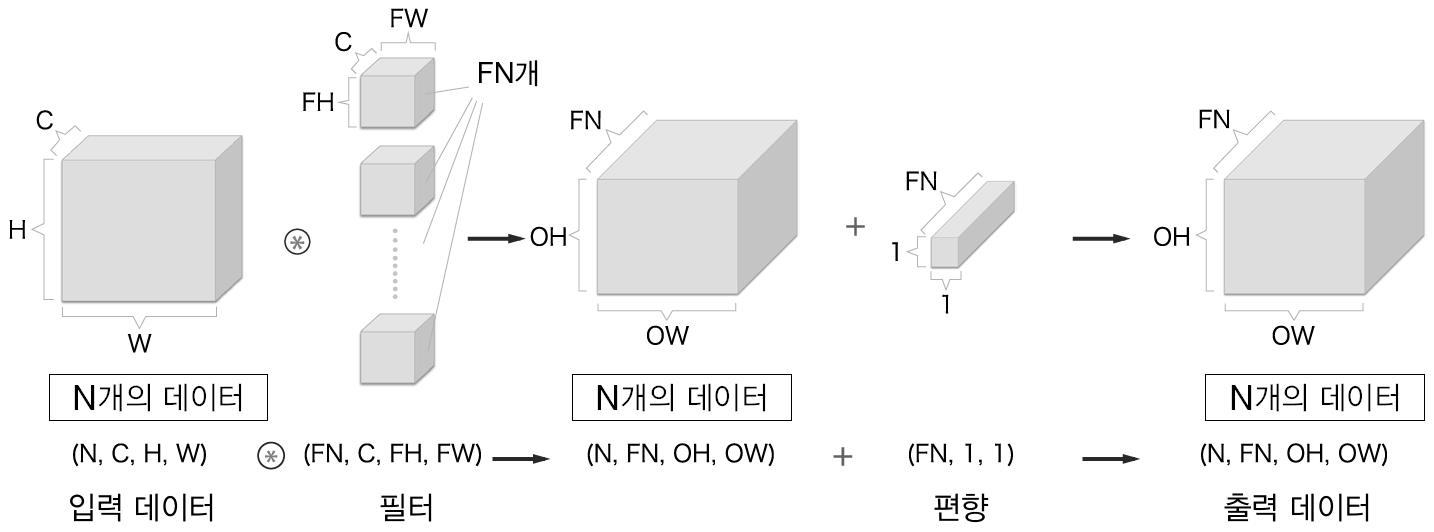

In [12]:
Image("7.png")

# CNN에서는 입력데이터, 필터, 출력데이터가 4차원 텐서로 흐른다

### 컨볼루션 레이어로 FCNN을 구현할 수 있다   
가령 32 x 10 x 10 을 입력으로 줬을 때   
필터도 32 x 10 x 10으로 한 다음 필터 개수를 100으로 하면   
노드가 100인 FCNN과 같다.

# 2. 풀링 레이어

### 풀링 레이어는 컨볼루션 레이어를 통과한 출력 데이터의 사이즈를 줄이는 연산이다.

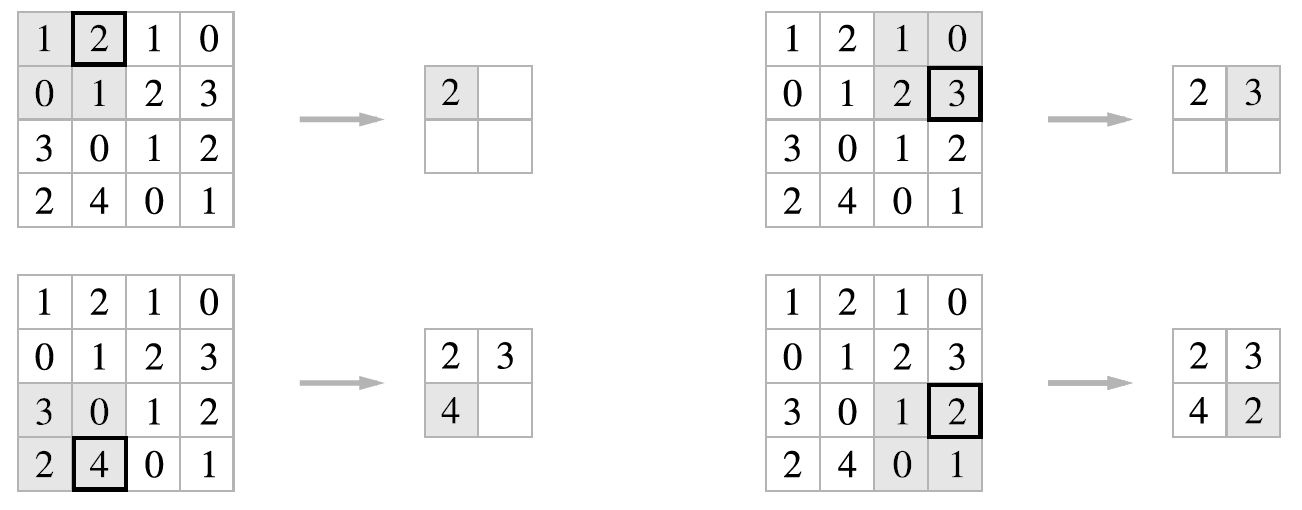

In [13]:
Image("8.png")

### 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는게 일반적이다.   
이미지 분야에서는 주로 맥스 풀링을 사용한다.

### 풀링 레이어의 특징   
1. 학습해야할 매개변수가 없다   
2. 채널 수가 변하지 않는다(풀링 레이어의 채널수는 입력데이터의 채널 수와 같아야 한다)
3. 입력의 변화에 영향을 적게 받는다

이미지 크기가 매우 클 때   
스트라이드 또는 풀링을 하면   
신경망 깊이를 덜 깊게 할 수 있다. 

## 신경망의 층을 깊게 했을 때의 장점  
**1. 매개변수 수를 줄일 수 있다**  그 결과 학습 데이터의 양을 줄여 깊이를 얕게 했을 때보다 학습속도가 상대적으로 빨라진다   
   
   
**2. 컨볼루셔널 레이어 사이에 활성화 함수가 많이 끼워 넣어져서 신경망의 표현력이 개선된다**

필터 크기를 크게 해서 신경망 깊이를 얕게 하는 것보다   
### 필터 크기를 작게 해서 신경망 깊이를 깊게 하는 것이   
### 더 적은 매개변수를 필요로 한다

5 x 5 컨볼루션 연산 1회 = 3 x 3 컨볼루션 연산 2회   
매개변수 개수 차이   
5 x 5 = **25** > 3 x 3 + 3 x 3 = **18**   
이 차이는 층이 깊어질수록 커진다

바꿔 말해    
### 신경망의 깊이를 깊게 하면 매개변수 수를 줄이면서도 같은 receptive field를 소화할 수 있게 된다.

### 층을 거듭할수록 활성화 함수를 컨볼루셔널 레이어에 더 집어넣게 되므로   
### 신경망이 더 복잡한 것도 표현할 수 있게 된다 

신경망 깊이가 깊으면
각 컨볼루셔널 레이어는 학습해야할 문제를 계층적으로 분해해 맡을 수 있게 된다.   
ex) 초반 레이어는 에지, 블롭 학습에 전념, 그 다음엔 텍스쳐, 그 다음엔 사물의 일부, 마지막엔 사물의 클래스에 뉴런이 반응한다      
또한 정보를 계층적으로 전달할 수 있게 된다   
ex) 에지를 추출한 층의 다음 층은 에지 정보를 쓸 수 있게 된다 

# 3. 컨볼루셔널 / 풀링 레이어 구현

4차원 배열

In [1]:
import numpy as np
x = np.random.rand(10, 1, 28, 28)  # 무작위 데이터 생성

In [24]:
x

array([[[[0.45946604, 0.58254071, 0.92341014, ..., 0.19135181,
          0.88569451, 0.58761332],
         [0.36484756, 0.20866931, 0.04385385, ..., 0.79006149,
          0.0206122 , 0.95858196],
         [0.9370932 , 0.81983393, 0.15753636, ..., 0.09874544,
          0.79357107, 0.80334204],
         ...,
         [0.77266169, 0.8446067 , 0.03472541, ..., 0.30238487,
          0.21991258, 0.92606433],
         [0.22746061, 0.96653547, 0.38786099, ..., 0.66425947,
          0.14942311, 0.68360333],
         [0.95101018, 0.74396832, 0.72697387, ..., 0.7310455 ,
          0.62171911, 0.31679799]]],


       [[[0.25121769, 0.81815744, 0.90673607, ..., 0.23289906,
          0.82542539, 0.52068158],
         [0.32926972, 0.7142145 , 0.9693929 , ..., 0.2801459 ,
          0.93303745, 0.2700439 ],
         [0.84575249, 0.16172749, 0.96460066, ..., 0.29886527,
          0.68169043, 0.75452627],
         ...,
         [0.66750311, 0.80530876, 0.20891381, ..., 0.91960604,
          0.70405811, 0

In [3]:
x.shape

(10, 1, 28, 28)

In [4]:
x[0].shape

(1, 28, 28)

## im2col 구현

im2col 함수   
4차원 데이터(이미지)를 입력받아 2차원 배열로 변환한다(평탄화)
    
    정확히는 입력 데이터에 필터가 적용되는 영역(3차원 블록)을 left-top부터 right-bottom 까지 
    하나씩 한줄로 펼쳐 2차원 배열을 만든다.

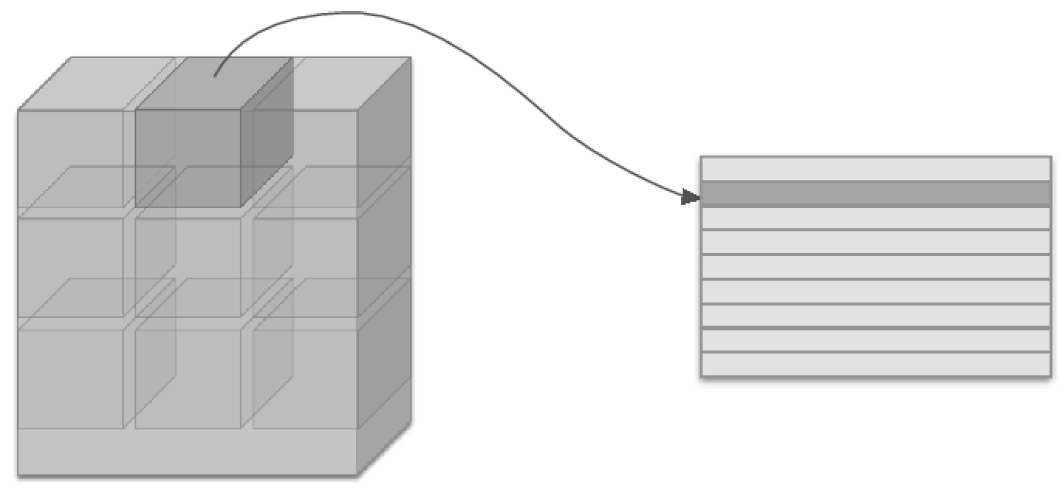

In [27]:
Image("9.png")

im2col로 입력 데이터를 행 방향으로 전개한 다음에는   
필터도 열 방향으로 전개해서    
두 행렬의 곱을 계산한다   
그 다음 출력값을 reshape해준다. N H W C 4차원 형상이 되도록

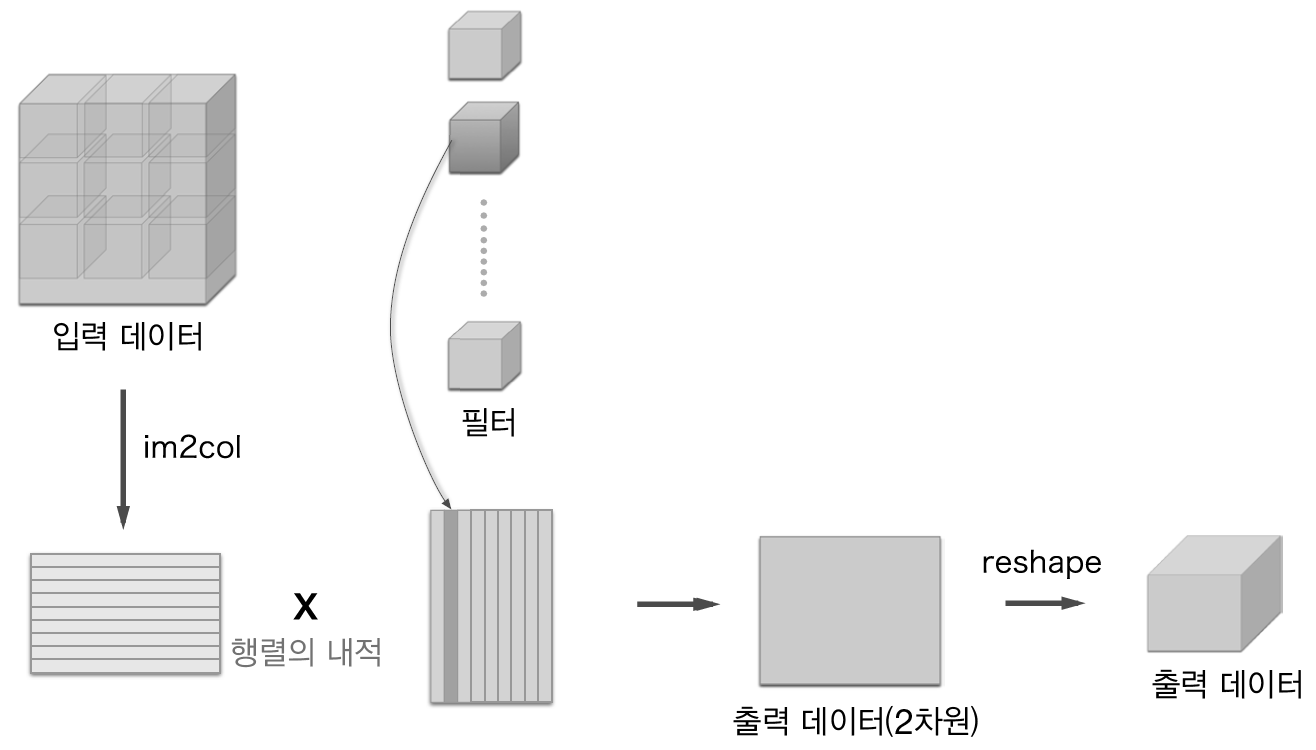

In [28]:
Image("10.png")

In [17]:
pad=0
stride=1
filter_h, filter_w = 5, 5
input_data = np.random.rand(10, 3, 7, 7)   

In [18]:
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')

In [19]:
img.shape

(10, 3, 7, 7)

In [21]:
N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1 # 출력 높이
out_w = (W + 2*pad - filter_w)//stride + 1 # 출력 너비
out_h, out_w

(3, 3)

In [22]:
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
col.shape

(10, 3, 5, 5, 3, 3)

In [32]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1 # 출력 높이
    out_w = (W + 2*pad - filter_w)//stride + 1 # 출력 너비

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')  # N, C, H, W 중 H, W 에만 패딩을 넣는다?
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):       # 5번 돌린다
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]  

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1) 
    return col

im2col 사용예제

In [23]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x2 = np.random.rand(10, 3, 7, 7)     # (데이터 수 10개, 채널 수, 높이, 너비)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(90, 75)


## 9 :  입력 이미지에  필터가 적용되는 영역
   
   
N * out_h * out_w = 배치사이즈 x (출력값-feature map 사이즈 = 필터 적용 영역 개수 =  필터가 이미지를 윈도우 사이즈만큼 합성곱 연산한 결과의 개수)
   
      
      
   
## 75 :   
   
   
C * filter_h * filter_w = 이미지와 필터의 컨볼루션 연산결과 = 필터의 차원수 = 3 *  5 *  5

### 컨볼루셔널 레이어 구현

In [34]:
class Convolution:                                 
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W   # 필터
        self.b = b   # 편향
        self.stride = stride
        sel.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape  # N, Cin, H, W
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad) # (90, 75)
        col_W = self.W.reshape(FN, -1).T   # 필터 전개 : (10, 3, 5, 5) 형상의 필터라면 (10, 75) 배열로 reshape, 
                                           # 마지막으로 transpose 해서 (75, 10)  10 : 필터 개수(출력 차원 10)
        out = np.dot(col, col_W) + self.b  # (90, 10) : 10(이미지수) * 9(feature map 사이즈 3 * 3) * 10(feature map 개수)
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) # N, FN(Cout), OH(H'), OW(W')
        
        return out

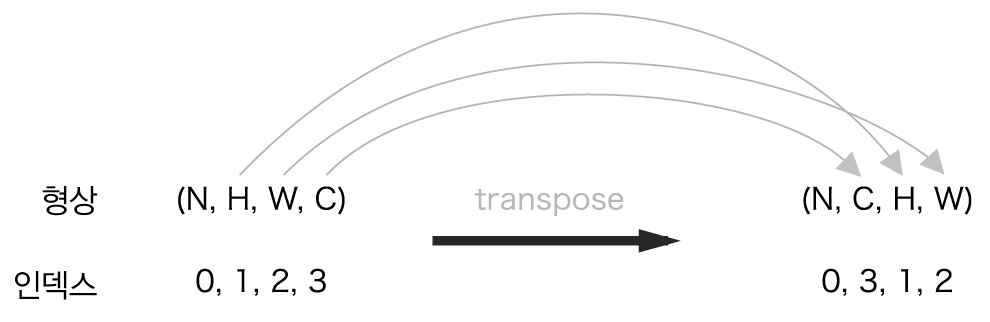

In [35]:
Image("11.png")

im2col 역전파 함수 col2im 구현은 common/util.py   
컨볼루셔널 레이어 역전파 구현은 common/layer.py

### 풀링 레이어 구현

풀링 적용 영역을 채널마다 독립적으로 전개   
전개한 행렬에서 행별 최댓값 구한 후  reshape   

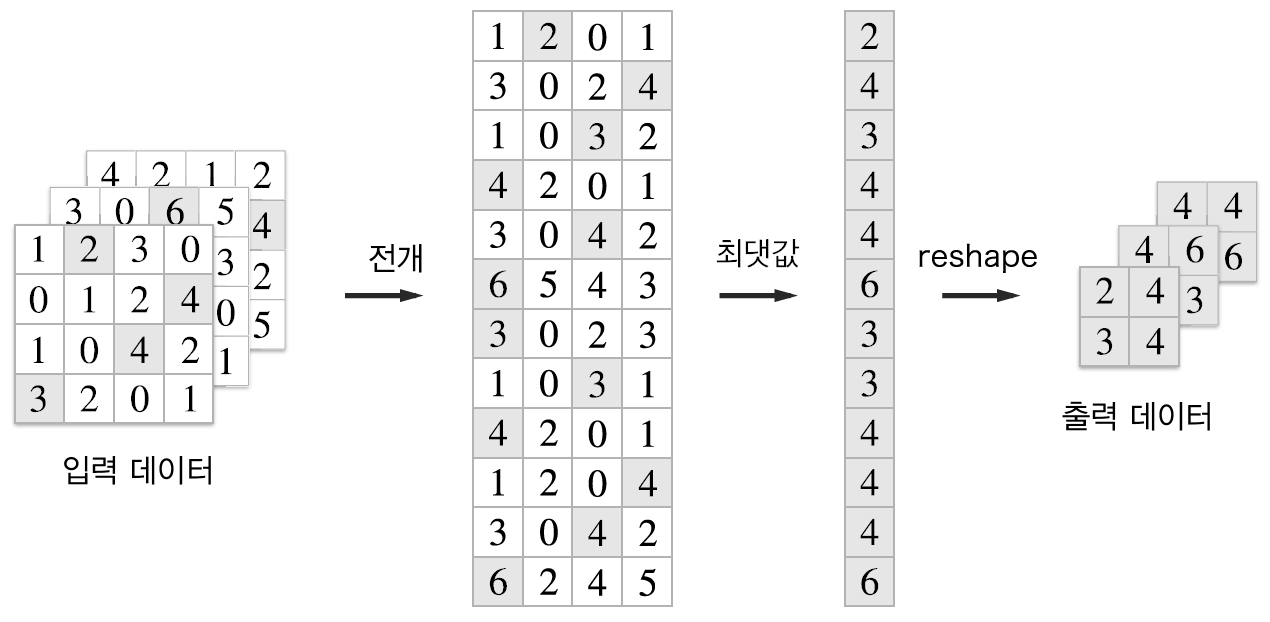

In [37]:
Image("13.png")

In [39]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 최댓값 (2)
        out = np.max(col, axis=1)   # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향 (axis =1은 col의 1번째 차원 축마다 최대값을 구한다)
        
        # 성형 (3)
        out = out.reshpe(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

풀링 전체 구현 common/layer.py

# 4. CNN 구현하기
- “Convolution-ReLU-Pooling---Affine-ReLU---Affine-Softmax” 순으로 흐르는 단순한 합성곱 신경망(CNN)입니다.


In [41]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """ Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28),                
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):   # hidden size : 은닉층(완전연결)의 뉴런 수 affine-ReLU
                                                                           # output size : 출력층(완전연결)의 뉴런 수  affine-softmax
        # 초기화 인수로 주어진 컨볼루션 계층의 하이퍼파라미터를 딕셔너리에서 꺼낸다.
        filter_num = conv_param['filter_num']     # 필터수
        filter_size = conv_param['filter_size']   # 필터 크기
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        
        # 컨볼루션 레이어와 풀링 레이어의 출력 크기를 계산한다. 
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1     
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        # 첫번째 컨볼루션 계층의 가중치와 편향
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        
        # 두번째 완전연결층의 가중치와 편향
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        
        # 출력층 완전연결층의 가중치와 편향 
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 각 가중치의 기울기 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

# SimpleConvNet으로 MNIST 데이터셋을 학습합니다.

In [42]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.3005040867023583
=== epoch:1, train acc:0.339, test acc:0.354 ===
train loss:2.2971184138380356
train loss:2.2948913739609904
train loss:2.290702240039847
train loss:2.280177896122587
train loss:2.2683245961560075
train loss:2.25948265617273
train loss:2.2460937698442525
train loss:2.228879831407018
train loss:2.217550356625371
train loss:2.1746451383363494
train loss:2.153574203376844
train loss:2.075153514875069
train loss:2.0603626936019626
train loss:2.0426776443474175
train loss:1.9579007300272635
train loss:1.870535929420325
train loss:1.8379286087577165
train loss:1.7242072888322852
train loss:1.666451756383861
train loss:1.5573134258578911
train loss:1.552038799707815
train loss:1.452761349539023
train loss:1.3497022331649131
train loss:1.2843413297307964
train loss:1.1610662689936389
train loss:1.0499857762431974
train loss:1.0573616964331058
train loss:0.9826180370118446
train loss:0.940843364499536
train loss:0.9422758238981243
train loss:0.7599605345621105
trai

train loss:0.17580917665772638
train loss:0.23947343655495168
train loss:0.173100904616995
train loss:0.2074582748134509
train loss:0.14518466492276227
train loss:0.23919774019664378
train loss:0.16706168803889576
train loss:0.22285353417375395
train loss:0.17532391701981911
train loss:0.17138724248192108
train loss:0.14688337030999596
train loss:0.2741788045670674
train loss:0.15020666654001955
train loss:0.18036587538173773
train loss:0.36795924928028023
train loss:0.18044845339131643
train loss:0.31237747876816996
train loss:0.33783682989985797
train loss:0.15584724512005405
train loss:0.18328005034219988
train loss:0.1739015190021751
train loss:0.14099942467079346
train loss:0.18564968441811516
train loss:0.22619190349976223
train loss:0.2378878973691031
train loss:0.1745476723005282
train loss:0.13503541123418994
train loss:0.24828389401206397
train loss:0.17537213454231387
train loss:0.23138850152765206
train loss:0.14286569928705906
train loss:0.17358229949797027
train loss:0.10

train loss:0.0968411120741385
train loss:0.09010686977498678
train loss:0.11464526409306977
train loss:0.06215609203838681
train loss:0.32913847306780725
train loss:0.18895250468389485
train loss:0.2501130266252075
train loss:0.13522911639407081
train loss:0.20730724443753773
train loss:0.166690985298244
train loss:0.10309821140240723
train loss:0.0823429074295715
train loss:0.1128961657913842
train loss:0.07197265230757767
train loss:0.04748740939208857
train loss:0.16861358342964572
train loss:0.13062004086790246
train loss:0.19355910284501437
train loss:0.07130141041284764
train loss:0.12926073823646914
train loss:0.1898502253183538
train loss:0.10285145298959318
train loss:0.1353170802768857
train loss:0.0886036633726524
train loss:0.06700122985176689
train loss:0.09220804906665586
train loss:0.0818388442331401
train loss:0.09517471998670013
train loss:0.10407324470616088
train loss:0.18619963583744734
train loss:0.06929556598154636
train loss:0.09942869223475888
train loss:0.08294

train loss:0.09740871346667843
train loss:0.0340046716585927
train loss:0.07457095966710205
train loss:0.04038404876506545
train loss:0.052002992824907196
train loss:0.07479137839338801
train loss:0.1090232766212194
train loss:0.042409016329897554
train loss:0.04527683574142331
train loss:0.09156330069665614
train loss:0.061015615160575284
train loss:0.1432228940548097
train loss:0.0683276547064434
train loss:0.09043758497540928
train loss:0.08975691232503624
train loss:0.10045804426167493
train loss:0.12369945351646919
train loss:0.0967569637367764
train loss:0.03434118248519521
train loss:0.04859883205424708
train loss:0.15943903612572868
train loss:0.11438665485220399
train loss:0.15652109798682948
train loss:0.1258613561043788
train loss:0.11173963346600425
train loss:0.09785714982459211
train loss:0.04120077050418408
train loss:0.09942057658274411
train loss:0.050839104149205526
train loss:0.06754717759282962
train loss:0.06786081871470788
train loss:0.05091067644103085
train loss

KeyboardInterrupt: 

## 1번째 층의 가중치 시각화하기
- 합성곱 1번째 층의 가중치를 학습 전과 후로 나눠 시각화해봅니다. 이미 학습된 가중치 값(params.pkl)을 읽어서 사용하므로 학습 과정은 생략됩니다.

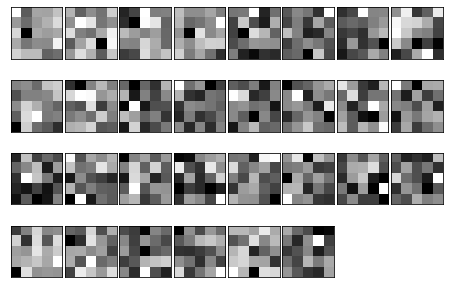

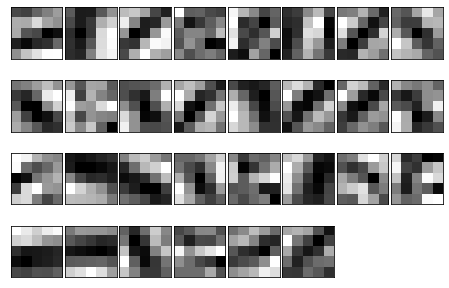

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 첫번째 층의 가중치
filter_show(network.params['W1'])  

# 학습된 첫번째 층의 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])  

학습된 필터 2개를 선택해 입력 이미지에 합성곱 처리를 한 결과   
필터1은 세로 에지에 반응   
필터2는 가로 에지에 반응 

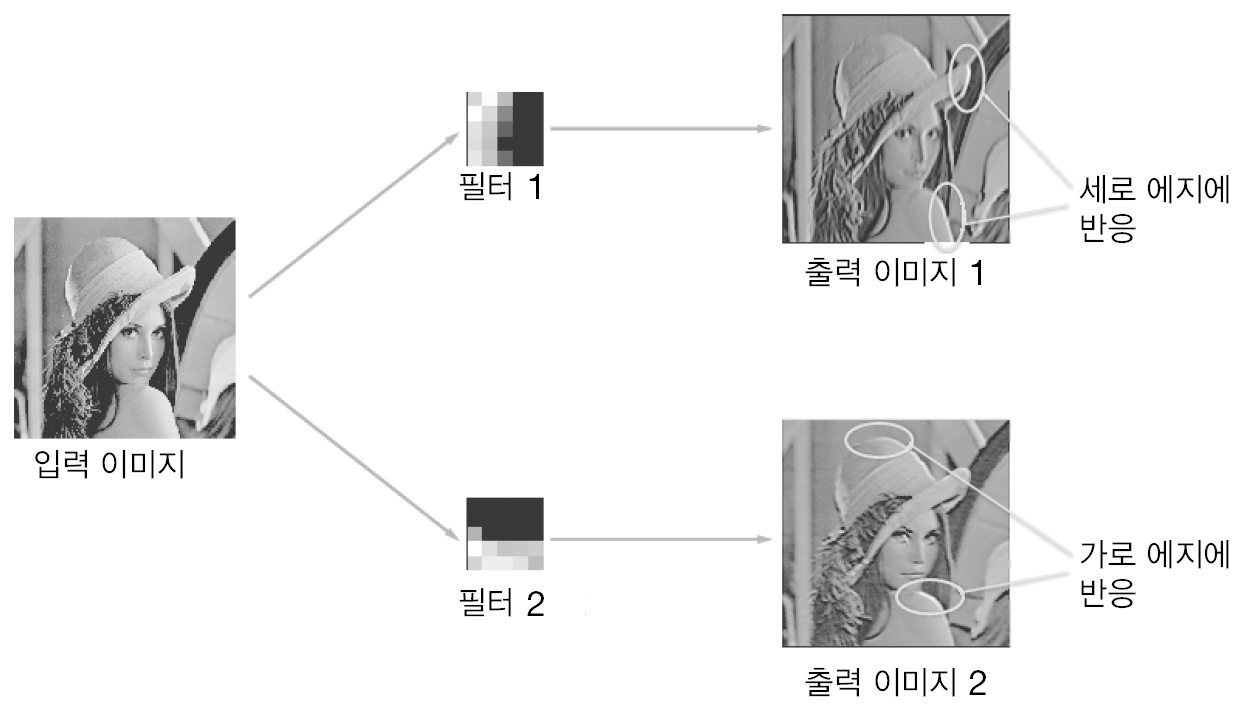

In [43]:
Image("14.png")

# 5. CNN 모델

# VGG16 or VGG19   
3 x 3  필터를 사용   
Conv-Relu 계층을 C, Pooling 레이어를 P 라고 하면   
VGG는   
CC P CC P CCC P CCC P CCC P C affine 구조를 취한다   

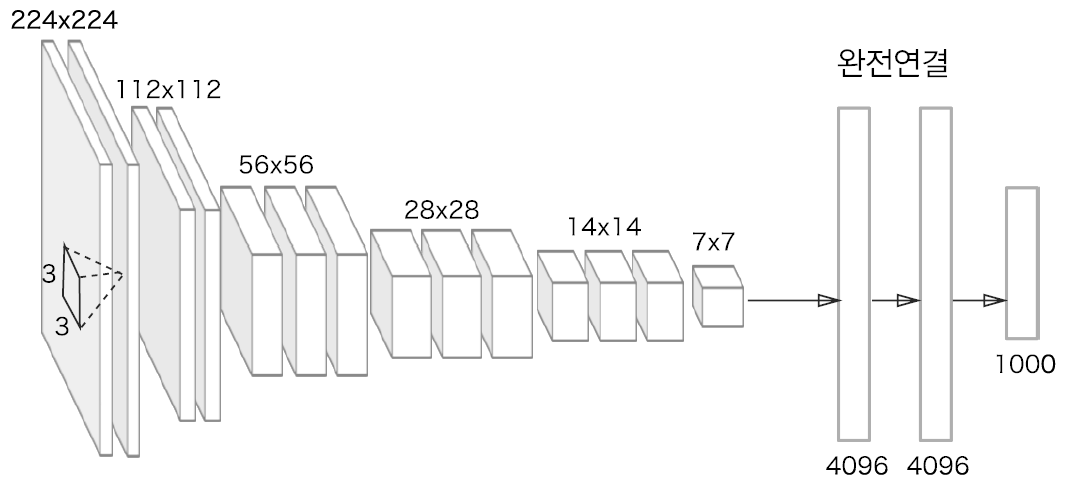

In [16]:
Image("a.png")

# Lenet   
활성화 함수로 Sigmoid 사용   
구글의 르넷은 신경망의 깊이도 깊지만 너비도 넓어진다는 특징을 갖는다.   
### 이를 인셉션 구조라고 한다.   
인셉션은 크기가 다른 필터를 동시에 여러개 적용해 그 결과를 결합한다.   
또 1 x 1 필터를 많은 곳에서 사용한다. (매개변수 제거와 고속처리에 기여)

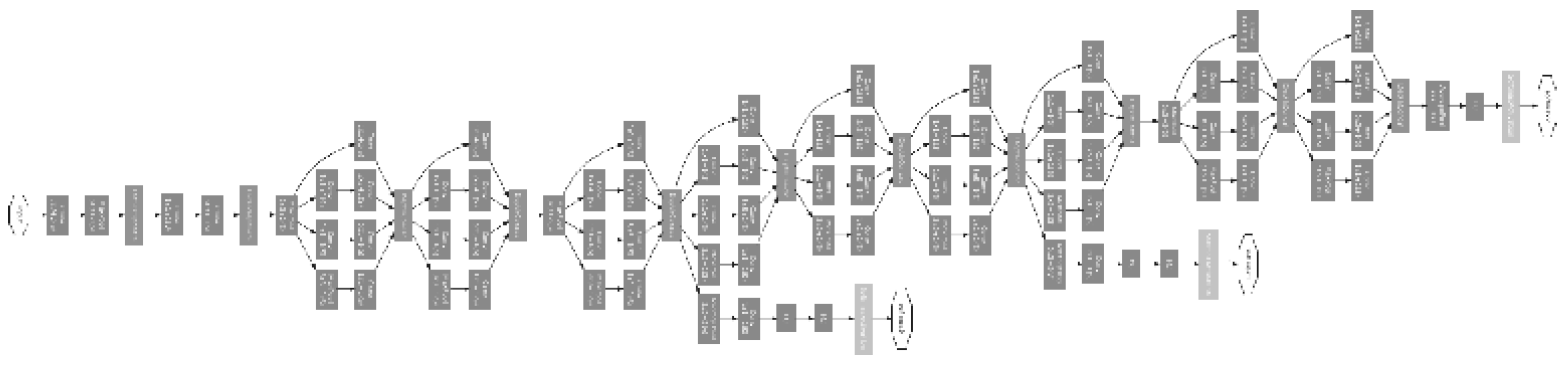

In [18]:
Image("b.png")

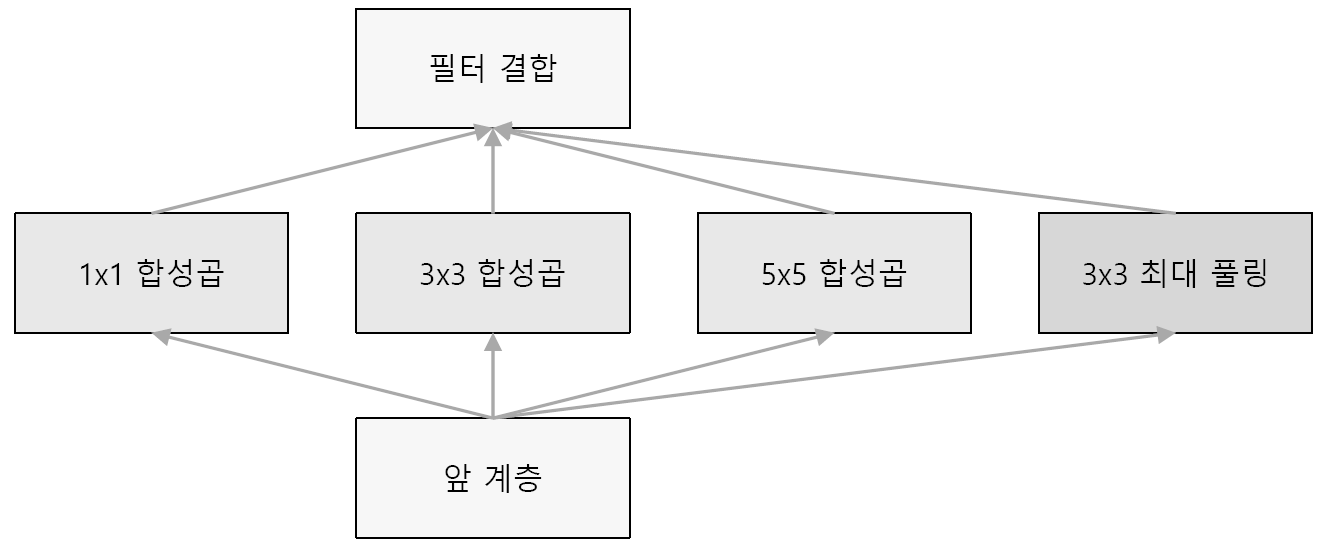

In [19]:
Image("c.png")

# ResNet   
레즈넷은 층을 깊게 하기 위해   
### skip connection 기법을 사용했다.   
입력 데이터를 컨볼루셔널 레이어를 건너뛰어 출력에 바로 더해주는 구조다.   
### 이렇게 함으로써 역전파시에도 기울기가 작아지거나 커질 걱정 없이 앞 층에 기울기를 그대로 흘려줄 수 있게 되어   
층을 깊게 할수록 발생할 가능성이 커지는 기울기 소실 문제를 해결한다   
   
      
      레즈넷은 컨볼루션 계층을 2개 층마다 건너 뛰어 스킵 커넥션을 해준다.

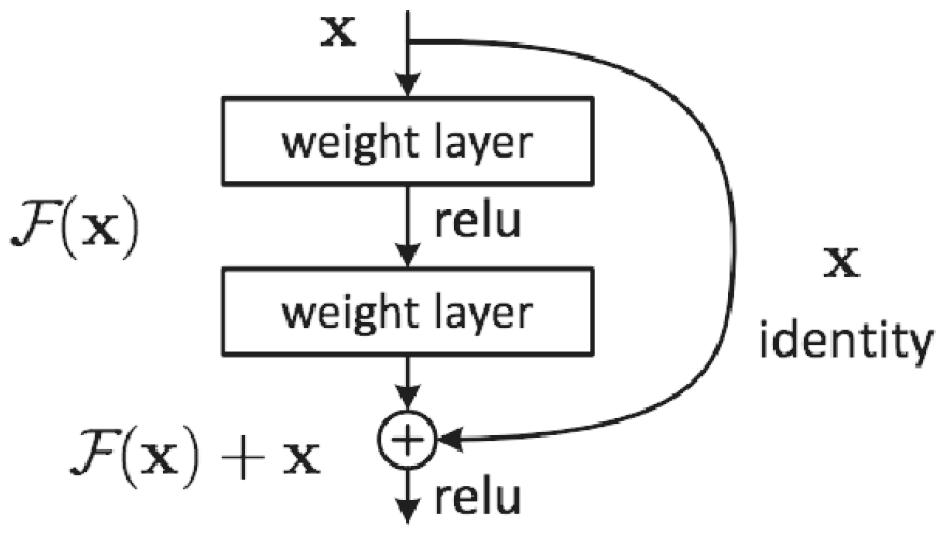

In [20]:
Image("d.png")

# AlexNet   
르넷과 비슷한 구조   
활성화 함수로 ReLU 사용   
local response normalization LRN 사용   
드롭아웃 사용

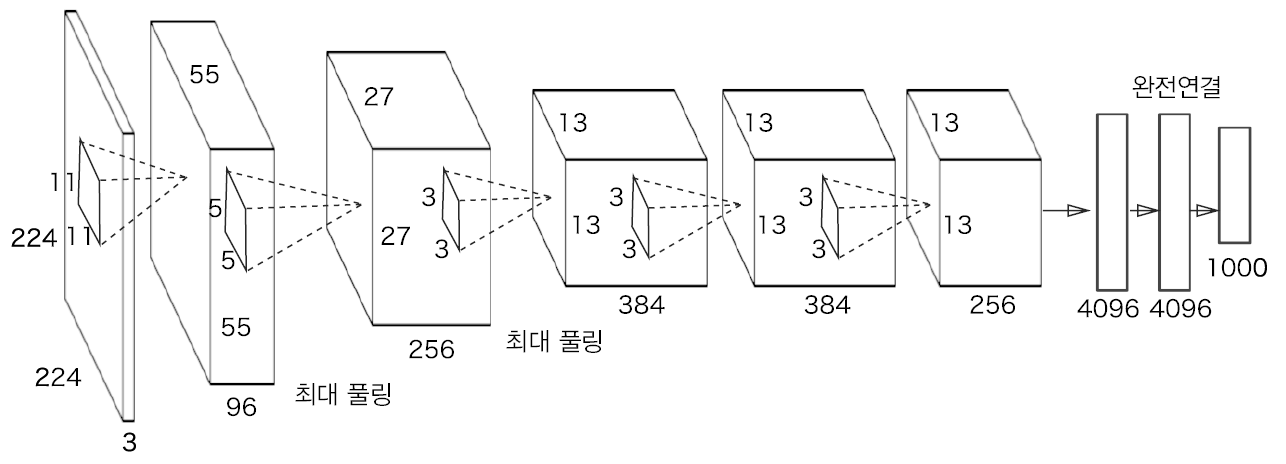

In [22]:
Image("e.png")